# rgbd 可视化

In [35]:
import open3d as o3d
# import open3d_example as o3de
import numpy as np
import copy,time,re,os,yaml,copy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 函数

In [4]:
def hist_sigema(a,m=2):
    matrix = np.asarray(a)
    plt.hist(matrix.ravel(), bins=50)   # 绘制矩阵的直方图
    mean = np.mean(matrix)
    std = np.std(matrix)
    # 标识2σ位置
    plt.axvline(mean - m * std, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(mean + m * std, color='r', linestyle='dashed', linewidth=2)
    plt.show()
def clean_sigema(a,m=2):
    matrix = np.asarray(a)
    mean = np.mean(matrix)
    std = np.std(matrix)
    matrix[matrix > mean + m * std] = mean + m * std
    matrix[matrix < mean - m * std] = mean - m * std
    # plt.imshow(matrix)
    # plt.show()
    return matrix
def show_rgbd(rgbd_image):
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
        rgbd_image,
        o3d.camera.PinholeCameraIntrinsic(
            o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
    # Flip it, otherwise the pointcloud will be upside down
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    o3d.visualization.draw_geometries([pcd])

## test rgbd

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

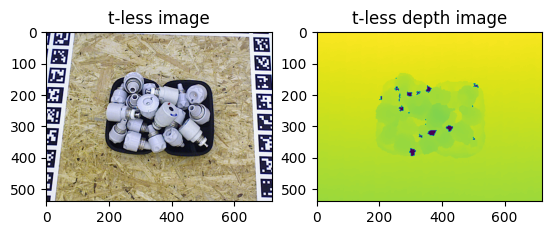

In [23]:
# 读取 展示
datadir = "E:\\DataSets\\t-less_v2\\test_primesense\\20\\"
print(os.listdir(datadir+'rgb'))

color_raw = o3d.io.read_image(datadir+'rgb\\0000.png')
depth_raw = o3d.io.read_image(datadir+'depth\\0000.png')

rgbd_image = o3d.geometry.RGBDImage.create_from_tum_format(
    color_raw, depth_raw,convert_rgb_to_intensity=False)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('t-less image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('t-less depth image')
plt.imshow(rgbd_image.depth)
plt.show()
# show_rgbd(rgbd_image)

## clean depth map

In [ ]:
# hist_sigema(rgbd_image.depth)
# depth_clean_1 = clean_sigema(rgbd_image.depth)
# hist_sigema(depth_clean_1)

In [ ]:
# # show cleaned rgbd
# color_raw = o3d.io.read_image(datadir+'rgb\\0013.png')
# depth_raw = o3d.geometry.Image(depth_clean_1)

# rgbd_image = o3d.geometry.RGBDImage.create_from_tum_format(
#     color_raw, depth_raw)
# show_rgbd(rgbd_image)

In [33]:
# 从深度图生成点云
# 给定相机内参，默认内参
# 图像分辨率为640x480，焦距（fx, fy）=（525.0, 525.0），光学中心（cx, cy）=（319.5, 239.5）
intrinsic_mat= [1075.65091572, 1073.90347929, 374.06888344, 254.72159802]
width, height = 720,540
intrinsic = o3d.camera.PinholeCameraIntrinsic(width, height, 
                                                  intrinsic_mat[0],
                                                  intrinsic_mat[1],
                                                  intrinsic_mat[2],
                                                  intrinsic_mat[3],)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,intrinsic)
# 翻转，相机小孔成像
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL:

In [34]:
# 平面检测
# 用ransac分割几何基元，找到支持度最大的平面
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01, # 一个点与一个估计的平面的最大距离，超过即立群
                                         ransac_n=3,              # 平面随机采样点数量
                                         num_iterations=1000)     # 随机平面被采样和验证的频率
[a, b, c, d] = plane_model                                        # 对于(x,y,z)，若ax+by+cz+d=0，则该点在平面上
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

Plane equation: -0.00x + 0.30y + 0.96z + 1.51 = 0


In [43]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True)
    cloud.estimate_normals()
    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud.paint_uniform_color([1, 0, 0])
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                      )


In [48]:
# 离群点清除
print("Statistical oulier removal")
plane_cloud = copy.deepcopy(inlier_cloud)
cl, ind = plane_cloud.remove_statistical_outlier(nb_neighbors=100,
                                                    std_ratio=5.0)
plane_cloud = plane_cloud.select_by_index(ind)
aabb = plane_cloud.get_oriented_bounding_box()
aabb.color = (1, 0, 0)
o3d.visualization.draw_geometries([pcd, aabb])

Statistical oulier removal


In [57]:
aabb.get_min_bound(),aabb.get_max_bound()


array([ 0.54536597,  0.41515997, -1.454699  ])

In [60]:
# cropped = pcd.crop_point_cloud(aabb)
# cropped = aabb.crop_point_cloud(pcd)
cropped = o3d.geometry.crop_point_cloud(pcd, aabb.get_min_bound(),aabb.get_max_bound())

o3d.visualization.draw_geometries([cropped])

AttributeError: module 'open3d.cpu.pybind.geometry' has no attribute 'crop_point_cloud'

# build mesh

In [94]:
import open3d as o3d
# import open3d_example as o3de
import numpy as np
import copy,time,re,os,yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [178]:
# get camera pose
def read_trajectory(filename):
    with open(filename, 'r') as f:
        data = yaml.safe_load(f)
        for item in data:
            cam_K = data[item]['cam_K']
            # data[item]['intrinsic'] = np.array(cam_K).reshape(3, 3)
            data[item]['intrinsic'] = [cam_K[0],cam_K[4],cam_K[2],cam_K[5]]

            cam_R_w2c = data[item]['cam_R_w2c']
            cam_t_w2c = data[item]['cam_t_w2c']
            r = np.array(cam_R_w2c).reshape(3, 3)
            t = np.array(cam_t_w2c).reshape(3, 1)
            data[item]['r'] = r
            data[item]['t'] = t

            # extrinsic
            mat_view = np.eye(4, dtype=np.float32) # From world space to eye space
            mat_view[:3, :3], mat_view[3, :3] = r.T, t.T
            trans = np.array(
                [
                    [ 1, -1, -1, 1],
                    [ 1, -1, -1, 1],
                    [ 1, -1, -1, 1],
                    [ 1, -1, -1, 1]
                ]
            )
            data[item]['extrinsic'] = np.multiply(mat_view,trans)


            # mat_view[:3, :3], mat_view[:3, 3] = r, t.squeeze()
            # data[item]['extrinsic'] = mat_view

            # yz_flip = np.eye(4, dtype=np.float32)
            # yz_flip[0,0],yz_flip[1, 1], yz_flip[2, 2] = 1,-1,-1
            # data[item]['extrinsic'] = yz_flip.dot(data[item]['extrinsic']).T
    return data

filename = 'RgbdData\\testrgbd\info.yml'
camera_poses = read_trajectory(filename)
print(camera_poses[1]['r'])
print(camera_poses[1]['t'])
print(camera_poses[1]['extrinsic'])


[[ 0.116212 -0.993172  0.010203]
 [-0.952608 -0.114361 -0.281887]
 [ 0.281129  0.023039 -0.959393]]
[[-10.6776]
 [ 17.5621]
 [786.959 ]]
[[ 1.16212003e-01  9.52607989e-01 -2.81129003e-01  0.00000000e+00]
 [-9.93171990e-01  1.14361003e-01 -2.30390001e-02  0.00000000e+00]
 [ 1.02030002e-02  2.81886995e-01  9.59393024e-01  0.00000000e+00]
 [-1.06775999e+01 -1.75620995e+01 -7.86958984e+02  1.00000000e+00]]


In [179]:
# build volume
volume = o3d.pipelines.integration.ScalableTSDFVolume(
    voxel_length=4.0 / 512.0,
    sdf_trunc=0.04,
    color_type=o3d.pipelines.integration.TSDFVolumeColorType.RGB8
    
    )


width, height = 720,540
DataFolder = "E:\\DataSets\\t-less_v2\\test_primesense\\20\\"
rgbd_color_paths = [DataFolder+"rgb\\"+os.path.relpath(i) for i in os.listdir(DataFolder+"rgb\\")]
rgbd_depth_paths = [DataFolder+"depth\\"+os.path.relpath(i) for i in os.listdir(DataFolder+"depth\\")]
# for i in range(len(camera_poses)):
for i in range(0,60,4):
    print("Integrate {:d}-th image into the volume.".format(i))
    color = o3d.io.read_image(rgbd_color_paths[i])
    depth = o3d.io.read_image(rgbd_depth_paths[i])

    rgbd = o3d.geometry.RGBDImage.create_from_tum_format(
        color, depth, convert_rgb_to_intensity=False
        )

    intrinsic = o3d.camera.PinholeCameraIntrinsic(width, height, 
                                                  camera_poses[i]['intrinsic'][0],
                                                  camera_poses[i]['intrinsic'][1],
                                                  camera_poses[i]['intrinsic'][2],
                                                  camera_poses[i]['intrinsic'][3],)
    volume.integrate(
        rgbd,
        intrinsic,
        np.linalg.inv(camera_poses[i]['extrinsic']))


Integrate 0-th image into the volume.
Integrate 4-th image into the volume.
Integrate 8-th image into the volume.
Integrate 12-th image into the volume.
Integrate 16-th image into the volume.
Integrate 20-th image into the volume.
Integrate 24-th image into the volume.
Integrate 28-th image into the volume.
Integrate 32-th image into the volume.
Integrate 36-th image into the volume.
Integrate 40-th image into the volume.
Integrate 44-th image into the volume.
Integrate 48-th image into the volume.
Integrate 52-th image into the volume.
Integrate 56-th image into the volume.


In [180]:
# Extract a triangle mesh
print("Extract a triangle mesh from the volume and visualize it.")
mesh = volume.extract_triangle_mesh()
mesh.compute_vertex_normals()
mesh.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.2)



o3d.visualization.draw_geometries([mesh, coordinate_frame],
                                  )
# o3d.io.write_triangle_mesh("DataFolder/ykMesh.ply", mesh,)


Extract a triangle mesh from the volume and visualize it.
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 


In [207]:

start_point = camera_poses[1]['t'].reshape((3))*np.array([0.1, 0.1, 0.001])
end_point = np.add(camera_poses[1]['r'].dot(np.array([1, 0, 0])),start_point)
points = np.array([start_point, end_point])
lines = np.array([[0, 1]])

# Set the points and lines
line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(points)
line_set.lines = o3d.utility.Vector2iVector(lines)

# Visualize the line set
o3d.visualization.draw_geometries([mesh, coordinate_frame,line_set])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 


In [203]:
start_point = camera_poses[1]['t'].reshape((3))*np.array([0.1, 0.1, 0.001])
# 创建一个半径为1的球体
mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.05)

# 将球体移动到坐标（1, 2, 3）
mesh_sphere.translate(start_point)
mesh_sphere.paint_uniform_color([1, 0, 0])

# Visualize the line set
o3d.visualization.draw_geometries([mesh,coordinate_frame, mesh_sphere])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 


In [193]:
start_point

array([-10.5776,  17.6621, 787.059 ])

In [199]:
start_point*np.array([0.001, 0.1, 0.1])

array([-1.05776e-02,  1.76621e+00,  7.87059e+01])

# 对齐rt

In [1]:
from pytless import inout, renderer, misc
import os
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import imageio

In [42]:
scene_id = 20 # Choose which scene_ids to render. Eg. range(1, 21)
device = 'primesense' # options: 'primesense', 'kinect', 'canon'
model_type = 'cad' # options: 'cad', 'reconst'
im_step = 100 # Consider every im_step-th image

# Path to the T-LESS dataset.
# Which you can download using the t-less_download.py script. 
data_path = 'E:\\DataSets\\t-less_v2'

# Path to the folder in which the images produced by this script will be saved
output_dir = os.path.join(data_path, 'output_check_poses_test_imgs')

# Paths to the elements of the T-LESS dataset
model_path_mask = os.path.join(data_path, 'models_' + model_type, 'obj_{}.ply')
scene_info_path_mask = os.path.join(data_path, 'test_{}', '{}', 'info.yml')
scene_gt_path_mask = os.path.join(data_path, 'test_{}', '{}', 'gt.yml')
rgb_path_mask = os.path.join(data_path, 'test_{}', '{}', 'rgb', '{}.png')
depth_path_mask = os.path.join(data_path, 'test_{}', '{}', 'depth', '{}.png')
rgb_ext = {'primesense': 'png', 'kinect': 'png', 'canon': 'jpg'}
obj_colors_path = os.path.join('data', 'obj_rgb.txt')
vis_rgb_path_mask = os.path.join(output_dir, '{}_{}_{}_{}_rgb.png')
vis_depth_path_mask = os.path.join(output_dir, '{}_{}_{}_{}_depth_diff.png')
misc.ensure_dir(output_dir)
obj_colors = inout.load_colors(obj_colors_path)

# plt.ioff() # Turn interactive plotting off


In [44]:
# Load info about the test images (including camera parameters etc.)
scene_info_path = scene_info_path_mask.format(device, '%02d'%scene_id)
scene_info = inout.load_info(scene_info_path)

scene_gt_path = scene_gt_path_mask.format(device, '%02d'%scene_id)
scene_gt = inout.load_gt(scene_gt_path)

# Load models of objects present in the scene
scene_obj_ids = set()
for gt in scene_gt[0]:
    scene_obj_ids.add(gt['obj_id'])
models = {}
for scene_obj_id in scene_obj_ids:
    model_path = model_path_mask.format('%02d'%scene_obj_id)
    models[scene_obj_id] = inout.load_ply(model_path)

for im_id, im_info in scene_info.items():
    if im_id % im_step != 0:
        continue
    print('scene: ' + str('%02d'%scene_id) + ', device: ' + device + ', im_id: ' + str('%04d'%im_id))

    # Get intrinsic camera parameters
    K = im_info['cam_K']

    # Visualization #1
    #-----------------------------------------------------------------------
    # Load RGB image
    rgb_path = rgb_path_mask.format(device, '%02d'%scene_id, '%04d'%im_id, rgb_ext[device])
    rgb = imageio.imread(rgb_path)

    im_size = (rgb.shape[1], rgb.shape[0])
    vis_rgb = np.zeros(rgb.shape, np.float64)
    for gt in scene_gt[im_id]:
        model = models[gt['obj_id']]
        R = gt['cam_R_m2c']
        t = gt['cam_t_m2c']
        surf_color = obj_colors[gt['obj_id'] - 1]

        ren_rgb = renderer.render(model, im_size, K, R, t,
                                    surf_color=surf_color, mode='rgb')

        # Draw the bounding box of the object
        ren_rgb = misc.draw_rect(ren_rgb, gt['obj_bb'])

        vis_rgb += 0.7 * ren_rgb.astype(np.float64)

    # Save the visualization
    vis_rgb = 0.6 * vis_rgb + 0.4 * rgb
    vis_rgb[vis_rgb > 255] = 255
    vis_rgb_path = vis_rgb_path_mask.format('%02d'%scene_id, device, model_type, '%04d'%im_id)
    imageio.imwrite(vis_rgb_path, vis_rgb.astype(np.uint8))

    # Visualization #2
    #-----------------------------------------------------------------------
    if device != 'canon':
        # Load depth image
        depth_path = depth_path_mask.format(device, '%02d'%scene_id, '%04d'%im_id, rgb_ext[device])
        depth = imageio.imread(depth_path)  # Unit: 0.1 mm
        depth = depth.astype(np.float64) * 0.1  # Convert to mm

        # Render the objects at the ground truth poses
        im_size = (depth.shape[1], depth.shape[0])
        ren_depth = np.zeros(depth.shape, np.float64)
        for gt in scene_gt[im_id]:
            model = models[gt['obj_id']]
            R = gt['cam_R_m2c']
            t = gt['cam_t_m2c']

            # Render the current object
            ren_depth_obj = renderer.render(model, im_size, K, R, t, mode='depth')

            # Add to the final depth map only the parts of the surface that
            # are closer than the surfaces rendered before
            visible_mask = np.logical_or(ren_depth == 0, ren_depth_obj < ren_depth)
            mask = np.logical_and(ren_depth_obj != 0, visible_mask)
            ren_depth[mask] = ren_depth_obj[mask].astype(np.float64)

        # Calculate the depth difference at pixels where both depth maps
        # are valid
        valid_mask = (depth > 0) * (ren_depth > 0)
        depth_diff = valid_mask * (depth - ren_depth.astype(np.float64))

        # Save the visualization
        vis_depth_path = vis_depth_path_mask.format('%02d'%scene_id, device,
                                                    model_type, '%04d'%im_id)
        plt.matshow(depth_diff)
        plt.title('captured - rendered depth [mm]')
        plt.colorbar()
        plt.savefig(vis_depth_path, pad=0)
        plt.close()

scene: 20, device: primesense, im_id: 0000


C:\Users\YangK\AppData\Local\Temp\ipykernel_528\3126898315.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb = imageio.imread(rgb_path)


ValueError: tile cannot extend outside image

In [58]:
from pytless.renderer import _Canvas
from vispy import app, gloo
import OpenGL.GL as gl
# model, im_size, K, R, t, 
clip_near=100
clip_far=2000
surf_color=None
bg_color=(0.0, 0.0, 0.0, 0.0)
ambient_weight=0.1
mode='rgb+depth'
# Process input data
#---------------------------------------------------------------------------
# Make sure vertices and faces are provided in the model
assert({'pts', 'faces'}.issubset(set(model.keys())))

# Set color of vertices
if not surf_color:
    if 'colors' in model.keys():
        assert(model['pts'].shape[0] == model['colors'].shape[0])
        colors = model['colors']
        if colors.max() > 1.0:
            colors /= 255.0 # Color values are expected to be in range [0, 1]
    else:
        colors = np.ones((model['pts'].shape[0], 4), np.float32) * 0.5
else:
    colors = np.tile(list(surf_color) + [1.0], [model['pts'].shape[0], 1])
vertices_type = [('a_position', np.float32, 3),
                    #('a_normal', np.float32, 3),
                    ('a_color', np.float32, colors.shape[1])]
vertices = np.array(list(zip(model['pts'], colors)), vertices_type)

# Rendering
#---------------------------------------------------------------------------
render_rgb = mode in ['rgb', 'rgb+depth']
render_depth = mode in ['depth', 'rgb+depth']
c = _Canvas(vertices, model['faces'], im_size, K, R, t, clip_near, clip_far,
            bg_color, ambient_weight, render_rgb, render_depth)
app.run()

#---------------------------------------------------------------------------
if mode == 'rgb':
    out = c.rgb
elif mode == 'depth':
    out = c.depth
elif mode == 'rgb+depth':
    out = c.rgb, c.depth
else:
    out = None
    print('Error: Unknown rendering mode.')
    exit(-1)

c.close()
print(out)

(array([], dtype=float64), array([], dtype=float64))


In [62]:
vertices, model['faces'], im_size, K, R, t, clip_near, clip_far,
bg_color, ambient_weight, render_rgb, render_depth

((0.0, 0.0, 0.0, 0.0), 0.1, True, True)

In [ ]:
rgb = gloo.read_pixels((0, 0, im_size[0], im_size[1]))[:, :, :3]
rgb = np.copy(rgb)
rgb

In [2]:
!python check_poses_test_imgs.py

Traceback (most recent call last):
  File "check_poses_test_imgs.py", line 47, in <module>
    scene_info_path = scene_info_path_mask.format(device, scene_id)
ValueError: Unknown format code 'd' for object of type 'str'
